# Finance Data Project 

#### Getting data

In [23]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

# [::-1] added to sort chronologically
BAC = data.DataReader('BAC', 'stooq', start, end)[::-1]
C = data.DataReader('C', 'stooq', start, end)[::-1]
GS = data.DataReader('GS', 'stooq', start, end)[::-1]
JPM = data.DataReader('JPM', 'stooq', start, end)[::-1]
MS = data.DataReader('MS', 'stooq', start, end)[::-1]
WFC = data.DataReader('WFC', 'stooq', start, end)[::-1]

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']


In [24]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.601  40.823  39.934  40.739  18832700.0  421.80  425.04   
2006-01-04   40.671  40.881  40.194  40.306  20521415.0  420.61  422.66   
2006-01-05   40.306  40.524  40.083  40.359  17129894.0  416.96  419.89   
2006-01-06   40.496  40.591  40.109  40.297  14554711.0  420.77  420.91   
2006-01-09   40.428  40.645  40.116  40.324  18050003.0  418.34  419.54   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   414.12  424.29  1786289.0  ...  38.813  39.706  38.516  39.582   
2006-01-04   416.17  416.44  2173546.0  ...  39.852  40.246  39.614  39.614   
2006-01-05   416.62  418.49  1318875.0  ...  39.614  39.778  39.384  39.722   
2006-01-06   414.90  418.49  1591822.0  ...  39.899  39.950  39.410  39.762   
2006-01-09   415.75  416.53  1952580.0  ...  39.800  40.253  39.793  40.178   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6575019.0  23.277  23.555  22.983  23.497  14956046.0  
2006-01-04   9755289.0  23.421  23.436  23.098  23.225  14757294.0  
2006-01-05   7065367.0  23.202  23.239  23.060  23.202  13754283.0  
2006-01-06   8424875.0  23.264  23.402  23.122  23.333  11409137.0  
2006-01-09   5067910.0  23.333  23.436  23.239  23.333   7629265.0  

[5 rows x 30 columns]

#### Exploring data

In [25]:
returns = pd.DataFrame()

for tick in tickers:
  returns[tick+'Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010629,-0.018501,-0.013638,-0.014285,0.000808,-0.011576
2006-01-05,0.001315,0.004923,-0.000371,0.003088,0.002726,-0.000990
2006-01-06,-0.001536,0.000000,0.013925,0.007071,0.001007,0.005646
2006-01-09,0.000670,-0.004684,0.011994,0.016227,0.010462,0.000000


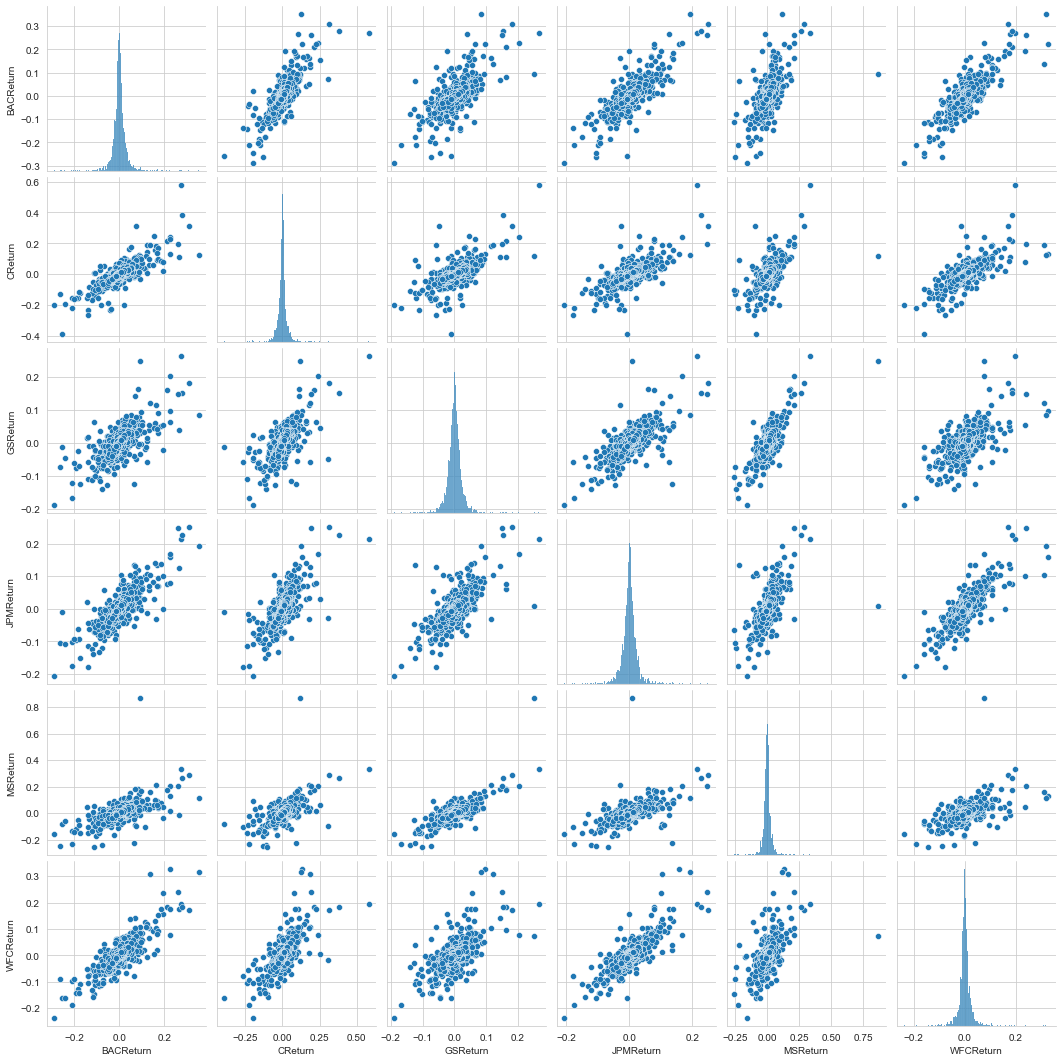

In [26]:
sns.pairplot(returns[1:])

In [27]:
print("Greatest losses:")
print(returns.idxmin())
print("\nGreatest gains:")
print(returns.idxmax())


Greatest losses:
BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

Greatest gains:
BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]


** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

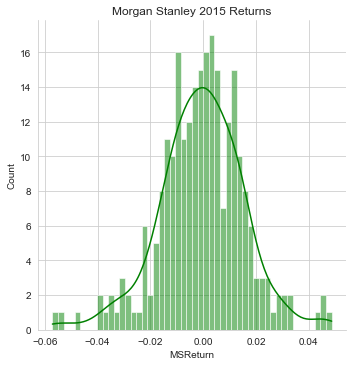

In [28]:
sns.displot(returns['2015-01-01':'2016-01-01']['MSReturn'], 
            color='green', 
            kde=True, 
            bins=50).set(title="Morgan Stanley 2015 Returns")

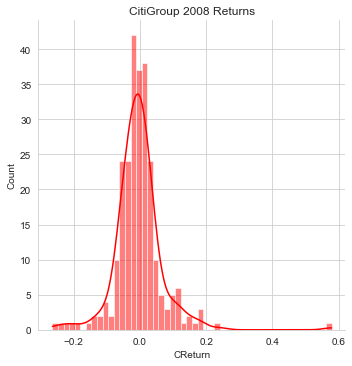

In [29]:
sns.displot(returns['2008-01-01':'2008-12-31']['CReturn'], 
            color='red', 
            kde=True, 
            bins=50).set(title="CitiGroup 2008 Returns")

#### Visualization


In [19]:
import plotly
import cufflinks as cf
cf.go_offline()

<AxesSubplot:xlabel='Date'>

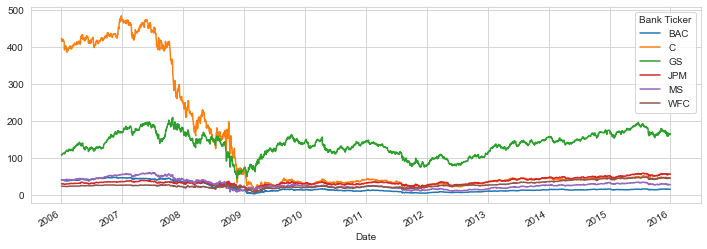

In [71]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,4))

In [73]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

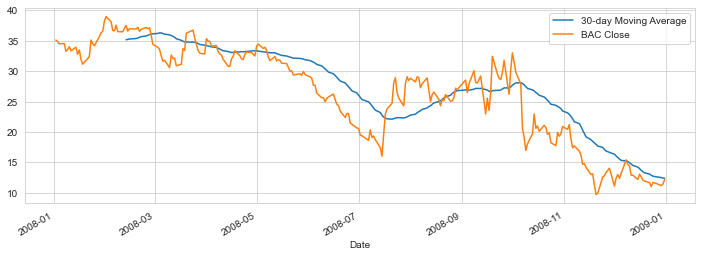

In [31]:
plt.figure(figsize=(12,4))
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label="30-day Moving Average")
BAC['Close']['2008-01-01':'2009-01-01'].plot(label="BAC Close")
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

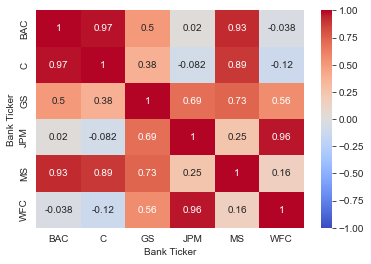

In [33]:
sns.heatmap(data=bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

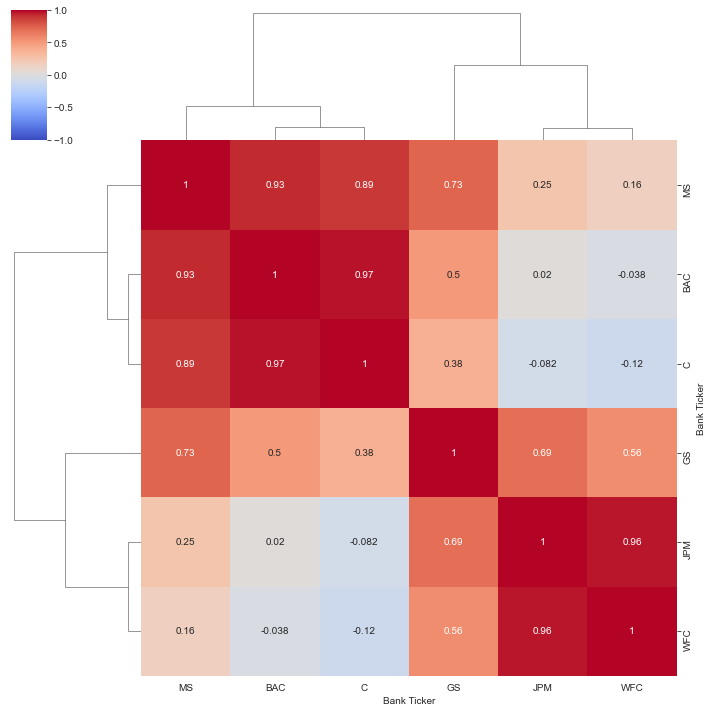

In [34]:
sns.clustermap(data=bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [35]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

#### Technical analysis plots

In [36]:
BAC[['Open', 'High', 'Low', 'Close']]['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [37]:
MS['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55])

In [38]:
BAC['Close']['2015-01-01':'2016-01-01'].ta_plot(study='boll', periods=14)